In [2]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


## Завантажимо бібліотеки

In [0]:
%%R
library(dplyr)
library(ggplot2)

## Завантажимо файл:

In [5]:
!wget https://edx.prometheus.org.ua/assets/courseware/v1/cd6e132ea399f2aab414977024a18192/c4x/IRF/Stat101/asset/filmdeathcounts.csv

--2020-04-02 09:33:26--  https://edx.prometheus.org.ua/assets/courseware/v1/cd6e132ea399f2aab414977024a18192/c4x/IRF/Stat101/asset/filmdeathcounts.csv
Resolving edx.prometheus.org.ua (edx.prometheus.org.ua)... 80.79.16.75
Connecting to edx.prometheus.org.ua (edx.prometheus.org.ua)|80.79.16.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40407 (39K) [application/vnd.ms-excel]
Saving to: ‘filmdeathcounts.csv’

filmdeathcounts.csv 100%[===================>]  39.46K  --.-KB/s    in 0s      

2020-04-02 09:33:27 (146 MB/s) - ‘filmdeathcounts.csv’ saved [40407/40407]



In [6]:
%%R
movie_body_counts <- read.csv('filmdeathcounts.csv')
print(head(movie_body_counts))
print(str(movie_body_counts))

                  Film Year Body_Count MPAA_Rating
1 24 Hour Party People 2002          7           R
2        28 Days Later 2002         53           R
3       28 Weeks Later 2007        212           R
4     30 Days of Night 2007         67           R
5                  300 2007        600           R
6         3:10 To Yuma 2007         45           R
                          Genre                Director Length_Minutes
1  Biography|Comedy|Drama|Music    Michael Winterbottom            117
2        Horror|Sci-Fi|Thriller             Danny Boyle            113
3        Horror|Sci-Fi|Thriller Juan Carlos Fresnadillo            100
4               Horror|Thriller             David Slade            113
5    Action|Fantasy|History|War             Zack Snyder            117
6 Adventure|Crime|Drama|Western           James Mangold            122
  IMDB_Rating
1         7.3
2         7.6
3         7.0
4         6.6
5         7.7
6         7.8
'data.frame':	545 obs. of  8 variables:
 $ Film 

## Додамо нове поле body_per_min, яке містить відношення всіх вбитих у фільмі до довжини фільму в хвилинах

In [11]:
%%R 
movie_body_counts$body_per_min <- movie_body_counts$Body_Count/movie_body_counts$Length_Minutes
head(movie_body_counts)

                  Film Year Body_Count MPAA_Rating
1 24 Hour Party People 2002          7           R
2        28 Days Later 2002         53           R
3       28 Weeks Later 2007        212           R
4     30 Days of Night 2007         67           R
5                  300 2007        600           R
6         3:10 To Yuma 2007         45           R
                          Genre                Director Length_Minutes
1  Biography|Comedy|Drama|Music    Michael Winterbottom            117
2        Horror|Sci-Fi|Thriller             Danny Boyle            113
3        Horror|Sci-Fi|Thriller Juan Carlos Fresnadillo            100
4               Horror|Thriller             David Slade            113
5    Action|Fantasy|History|War             Zack Snyder            117
6 Adventure|Crime|Drama|Western           James Mangold            122
  IMDB_Rating body_per_min
1         7.3   0.05982906
2         7.6   0.46902655
3         7.0   2.12000000
4         6.6   0.59292035
5         7

## Побудуємо гістограму для кількості персонажів, які загинули

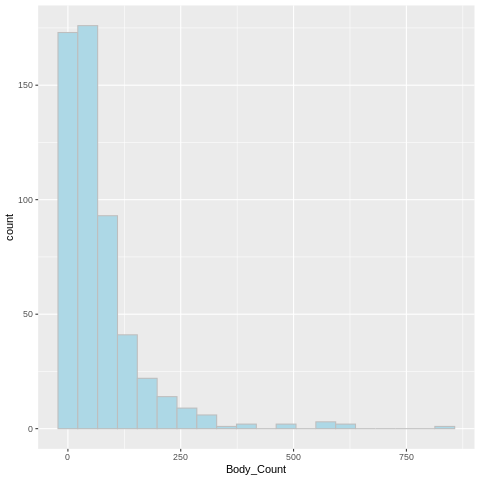

In [17]:
%%R 
ggplot(movie_body_counts, aes(x=Body_Count)) + 
       geom_histogram(bins=20, color="grey", fill="lightblue")

## Знайдемо топ 10 фільмів, де загинуло найбільше персонажів

In [18]:
%%R
movie_body_counts %>%
    top_n(n=10, Body_Count) %>%
    arrange(desc(Body_Count))

                                    Film Year Body_Count MPAA_Rating
1  Lord of the Rings: Return of the King 2003        836       PG-13
2                      Kingdom of Heaven 2005        610           R
3                                    300 2007        600           R
4     Tae Guk Gi: The Brotherhood of War 2004        590           R
5                                   Troy 2004        572           R
6                       The Last Samurai 2003        558           R
7                  A Fistful of Dynamite 1971        471          PG
8          Lord of the Rings: Two Towers 2002        468       PG-13
9                            Windtalkers 2002        389           R
10                           King Arthur 2004        378           R
                                Genre          Director Length_Minutes
1            Action|Adventure|Fantasy     Peter Jackson            201
2  Action|Adventure|Drama|History|War      Ridley Scott            144
3          Action|Fantasy|Hi

## Та фільми, де загинуло найбільше кількість персонажів по відношенню до довжини фільму:

In [19]:
%%R 
movie_body_counts %>% 
      top_n(n=10, body_per_min) %>% 
      arrange(desc(body_per_min))

                                    Film Year Body_Count MPAA_Rating
1                                    300 2007        600           R
2                      Kingdom of Heaven 2005        610           R
3     Tae Guk Gi: The Brotherhood of War 2004        590           R
4  Lord of the Rings: Return of the King 2003        836       PG-13
5                       The Last Samurai 2003        558           R
6                                   Troy 2004        572           R
7                  A Fistful of Dynamite 1971        471          PG
8                            King Arthur 2004        378           R
9                        The Big Red One 1980        338           R
10                           Windtalkers 2002        389           R
                                Genre          Director Length_Minutes
1          Action|Fantasy|History|War       Zack Snyder            117
2  Action|Adventure|Drama|History|War      Ridley Scott            144
3                    Action|

## Побудуємо гістограму для IMDB рейтингу

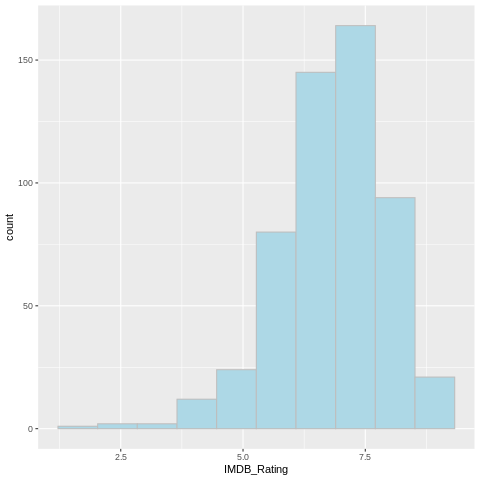

In [21]:
%%R
ggplot(movie_body_counts, aes(IMDB_Rating)) + 
      geom_histogram(bins=10, color="grey", fill="lightblue")

## *Знайдіть середнє значення та середньоквадратичне відхилення для змінної IMDBrating, змінним дайте назви imdb_mean та imdb_sd:*
`imdb_mean <- ваш код тут`

`imdb_sd <- ваш код тут`

In [57]:
%%R 
imdb_mean <- mean(movie_body_counts$IMDB_Rating)
imdb_sd <- (sum((movie_body_counts$IMDB_Rating - imdb_mean)**2) / length(movie_body_counts$IMDB_Rating))**0.5
print(imdb_mean)
print(imdb_sd)

[1] 6.835963
[1] 1.112494


#### Давайте згенеруємо нормальний розподіл, який має середнє значення imdb_mean та середньоквадратичне відхилення imdb_sd. Для цього використаємо функцію rnorm. Для того, щоб послідовність, яка генерується була сталою, при кожному виконанні нашого коду, встановимо параметр set.seed

Додамо ці значення до нашої таблиці.

Побудуємо гістограму для цієї симуляції


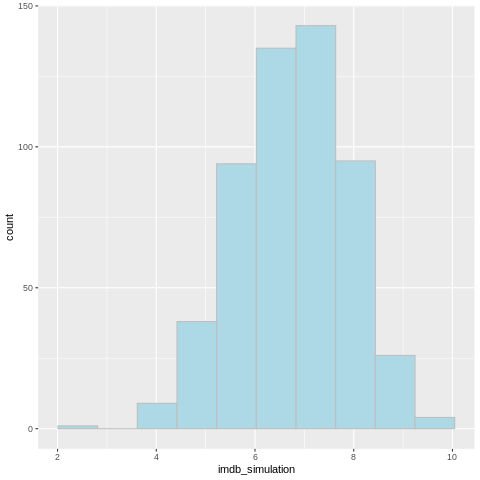

In [58]:
%%R 
set.seed(900)
imdb_simulation <- rnorm(n=nrow(movie_body_counts), mean = imdb_mean, sd = imdb_sd)

movie_body_counts$imdb_simulation <- imdb_simulation

ggplot(movie_body_counts, aes(x=imdb_simulation)) +
    geom_histogram(bins=10, color="grey", fill="lightblue")

### Для перевірки, чи є розподіл нормальним, використовується функція qqplot. Давайте скористаємося нею для перевірки чи є нормально розподілені дані рейтингу IMDB. Спочатку побудуємо qqplot для нашої симуляції imdb_simulation:

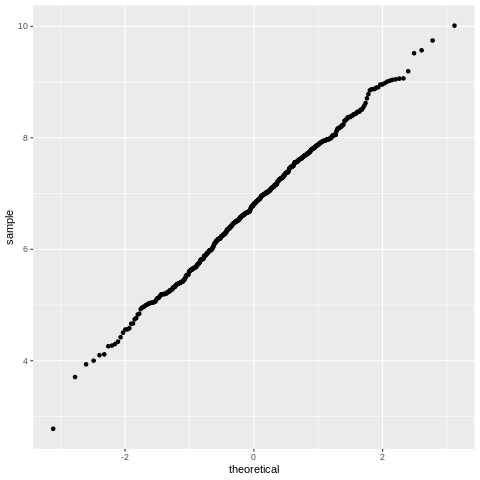

In [64]:
%%R 
ggplot(movie_body_counts, aes(sample=imdb_simulation)) + stat_qq()

### А тепер для справжнього рейтингу IMDB_Rating:

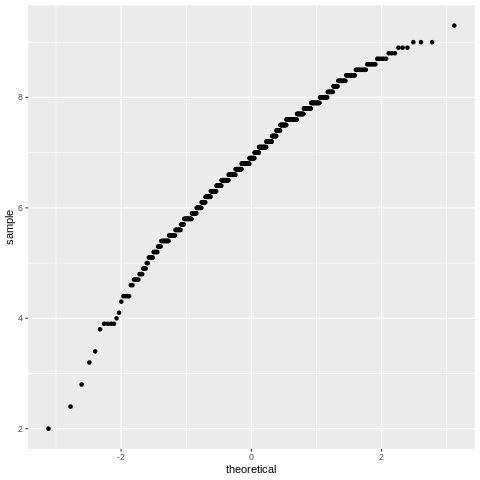

In [68]:
%%R 
ggplot(movie_body_counts, aes(sample=IMDB_Rating)) + stat_qq()

## Завдання лабораторної роботи

1. Питання лабораторної: чи є нормальним розподіл IMDB рейтингу?

- [ ] Так 
- [x] Ні

2. Для згенерованого IMDB (змінна 'imdb_simulation'), яка ймовірність отримати IMDB 4.0 або менше?


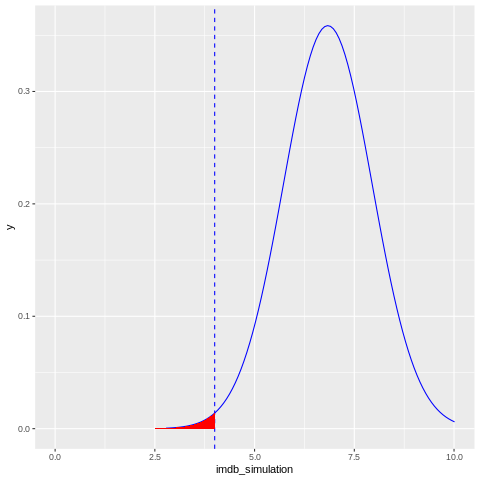

In [81]:
%%R 
ggplot(movie_body_counts, aes(imdb_simulation)) + 
    geom_vline(xintercept=4.0, linetype=2, colour="blue") +
    stat_function(fun=dnorm, color="blue", args=list(mean=imdb_mean, sd=imdb_sd)) + 
    geom_area(stat="function", fun=dnorm, fill="red", xlim=c(0,4.0), args = list(mean=imdb_mean, sd=imdb_sd)) 

In [88]:
%%R 
pnorm((4.0 - imdb_mean)/imdb_sd, lower.tail=TRUE)

[1] 0.005398599


In [89]:
%%R 
pnorm(4.0, mean=imdb_mean, sd=imdb_sd, lower.tail=TRUE)

[1] 0.005398599


3. Для згенерованого IMDB (змінна imdb_simulation), яка ймовірність значення між 4 і 8?

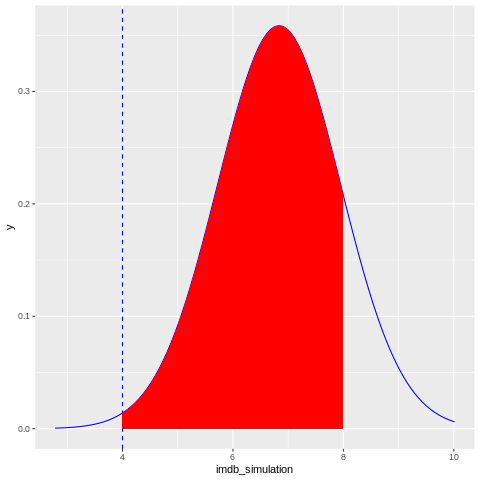

In [85]:
%%R 
ggplot(movie_body_counts, aes(imdb_simulation)) + 
    geom_vline(xintercept=4.0, linetype=2, colour="blue") +
    stat_function(fun=dnorm, color="blue", args=list(mean=imdb_mean, sd=imdb_sd)) + 
    geom_area(stat="function", fun=dnorm, fill="red", xlim=c(4.0,8.0), args = list(mean=imdb_mean, sd=imdb_sd)) 

In [87]:
%%R 
pnorm((8 - imdb_mean)/imdb_sd, lower.tail=TRUE)

[1] 0.8522959


4. Знайдіть коефіцієнт кореляції між кількістю загиблих у фільмі та рейтином IMDB.

In [90]:
%%R
cor(movie_body_counts$Body_Count, movie_body_counts$IMDB_Rating)

[1] 0.07047715


5. Чи є лінійна залежність між кількістю загиблих у фільмі та рейтином IMDB?

- [ ] Так
- [x] Ні